**Introduction**

Heart Disease is a major issue which contributes to global morbidity and mortality (Dai et al., 2021). In the United States of America, one person dies every 34 seconds from a heart disease (Centers for Disease Control and Prevention, 2022). Many people who have a heart disease do not show any physical symptoms and as a result are not diagnosed (Jin 2014). In turn, these individuals are not taking medications to help prevent the progression of the heart disease. Thus, predictive models are needed to help diagnose patients especially those who are asymptomatic in order to intervene with the progression of the disease.

In this project, we will be examining the Heart Disease Data from the University of California, Irvine's Machine Learning Repository (Janosi et al., 1988). The dataset is collected from three separate countries, the United States, Switzerland, and Hungary. It is composed of 14 different variables which are age, sex, chest pain type, resting blood pressure, serum cholesterol, fasting blood sugar, resting electrocardiographic results, maximum heart rate achieved, exercise-induced angina, oldpeak — ST depression induced by exercise relative to rest, the slope of the peak exercise ST segment, number of major vessels and Thalassemia. All 14 variables are quantitative.

According to the Centre for Disease and Prevention (Centers for Disease Control and Prevention, 2022) the risk factors for a heart disease are: age, sex, high blood pressure, high cholesterol, diabetes, high heart rates achieved and intense chest pain. Thus, from the 14 variables, we only examined 8 from the dataset which are: age, sex, blood pressure (trestbps), chest pain (cp), maximum heart rate achieved (thalach), cholesterol (chol), and fasting blooding sugar (fbs) as these would most likely influence the progression of a heart disease, and the diagnosis of heart disease variable.
The major role of this project is to use the variables from the dataset to help predict whether a patient has a heart disease or not.


**Methods and Results**

To determine whether a patient is likely to have a heart disease or not, it is necessary to take steps in reading, cleaning, and visualizing the data. First, we took the heart disease data from the UCI ICS website. There were multiple different countries to choose our data set from, so we combined three countries: Hungary, Switzerland, and Cleveland to create the “heart_data” dataset. 
The dataset provides 14 variables; however, we examined only 8 variables as described in the introduction. In the following paragraph, we have a closer look at some of the these variables: 
In the data set, a value of 0 in the sex variable means the patient is a female, 1 means he is a male.  A cholesterol value higher than 200 mg/dL is high risk for a patient to have a heart disease (UPenn Medicine, 2022). Additionally, a blood pressure value of higher than 130 mmHg is a high risk for heart disease (Heart, 2022). Diabetes is represented in the variable *fbs*. If the value of fasting blood sugar is  >120 mg/dl it indicates diabetes (Mayo Clinic, 2022). A value of 4 in the chest pain variable indicates no chest pain and anything between 0-3 indicates chest pain from the dataset.

In addition, the variable “num” was separated into severity levels ranging from 1 to 4, with 1 being no disease and 4 being very severe. We changed this into a binary label (0 and 1), where any value of “num” that is greater or equal to 1, became 1, which shows that there is presence of a heart disease. We did this because we are only interested in its presence and absence and not its severity. 
Once we had the specific data we wanted, we cleaned the data and removed rows containing “?” and changed the variables to the appropriate type. We turned trestbps into a numeric type, changed fbs to factor, num to a factor, and thalach to numeric using the f2unction “mutate”. 
After our data is cleaned, the next step was to split our data into a training and testing set by taking 75% of the data in the training set, and 25% of the data in the testing set by using the “tidymodels” package which shuffles the original dataset and stratifies it to ensure the two split subsets of data have approximately equal proportions of the different labels. We used cross-validation to split the training data into a training and validation set to obtain a better accuracy of our knn classifier. Prior to creating our classification model, we visualized our data by creating pair-wise scatter plots and summary tables of all six variables using the ggpairs function in the GGally package to examine the correlations between the variables.
After this we moved on to create our classification model. Prior to creating our model, we examined the proportion of observations that had a heart disease diagnosis vs those that did not in our cleaned heart dataset to ensure that the labels were balanced. As the labels in the cleaned dataset are balanced, we did not need to balance the labels during the creation of our model. Next we created the recipe for the classification model where we indicated the variables of interest, predictor variable, and dataset of interest, and that the data was to be scaled and centered. After this step, we performed cross-validation on the training data set to find the best K value (number of neighbors) for our model and used the workflow() function to create our model and plotted the graph of each k against its accuracy. However, we found less accuracy than expected when we fit the model to our testing data. Thus, we added two more variables (the Maximum Heart Rate achieved “thalach” and Chest Pain “cp”) which were associated with heart disease to the classification model. After, we fitted this new model to the testing dataset to examine the new accuracy.
To understand the accuracy of the model graphically, we created four plots. In the first two plots (figures 7 and 8), we plotted maximum heart rate vs serum cholesterol while coloring the data points based on heart disease presence. In the second group of plots (plot 9 and 10), we examined resting blood pressure vs age. Figures 7 and 9 were both created using the predicted heart disease diagnosis from our model, and Figures 10 and 11 were from the actual diagnosis from the original dataset.  

In [1]:
#group 24
library (ggplot2)
library (tidyverse)
library(tidymodels)
library(dplyr)
library (cowplot)
library (knitr)
set.seed (42)

hungary <- read_csv ("https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.hungarian.data", col_names = FALSE)
colnames(hungary) <- c("age", "sex", "cp", "trestbps", "chol", "fbs", "restecg", "thalach", "exang", "oldpeak", "slope", "ca", "thal", "num")

switzerland<- read_csv ("https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.switzerland.data", col_names = FALSE)
colnames(switzerland) <- c("age", "sex", "cp", "trestbps", "chol", "fbs", "restecg", "thalach", "exang", "oldpeak", "slope", "ca", "thal", "num")

cleveland<- read_csv ("https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.cleveland.data", col_names = FALSE)
colnames(cleveland) <- c("age", "sex", "cp", "trestbps", "chol", "fbs", "restecg", "thalach", "exang", "oldpeak", "slope", "ca", "thal", "num")

va<- read_csv ("https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.va.data", col_names = FALSE)
colnames(va) <- c("age", "sex", "cp", "trestbps", "chol", "fbs", "restecg", "thalach", "exang", "oldpeak", "slope", "ca", "thal", "num")

heart_data <- rbind (hungary,switzerland,cleveland,va)


── Attaching packages ─────────────────────────────────────── tidyverse 1.3.1 ──

✔ tibble  3.1.7     ✔ dplyr   1.0.9
✔ tidyr   1.2.0     ✔ stringr 1.4.0
✔ readr   2.1.2     ✔ forcats 0.5.1
✔ purrr   0.3.4     

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()

── Attaching packages ────────────────────────────────────── tidymodels 1.0.0 ──

✔ broom        1.0.0     ✔ rsample      1.0.0
✔ dials        1.0.0     ✔ tune         1.0.0
✔ infer        1.0.2     ✔ workflows    1.0.0
✔ modeldata    1.0.0     ✔ workflowsets 1.0.0
✔ parsnip      1.0.0     ✔ yardstick    1.0.0
✔ recipes      1.0.1     

── Conflicts ───────────────────────────────────────── tidymodels_conflicts() ──
✖ scales::discard() masks purrr::discard()
✖ dplyr::filter()   masks stats::filter()
✖ recipes::fixed()  masks stringr::fixed()
✖ dplyr::lag()      masks stats::lag()
✖ yardstick::spec() masks readr::spec()
✖ 

In [2]:
heart_data_cleaned <- heart_data %>%
  select('age', 'sex', 'trestbps', 'chol', 'fbs', 'num', 'thalach', 'cp') %>%
  mutate(
      num = dplyr::case_when(
          num %in% c(1, 2, 3, 4) ~ 1,
          TRUE ~ 0
      )
    )%>%
  drop_na() %>%
    filter(fbs %in% c(1, 0)) %>%
   # filter(chol %in% c(1, 0)) %>%
    mutate(trestbps = as.numeric (trestbps),
           chol = as.numeric (chol),
           fbs = as_factor (fbs),
           num = as_factor(num),
           thalach = as.numeric (thalach)
  ) %>% drop_na(trestbps) %>%
        drop_na (chol)

heart_data_cleaned %>% count(num)

Warning message in mask$eval_all_mutate(quo):
“NAs introduced by coercion”
Warning message in mask$eval_all_mutate(quo):
“NAs introduced by coercion”
Warning message in mask$eval_all_mutate(quo):
“NAs introduced by coercion”


num,n
<fct>,<int>
0,359
1,386


In [3]:
tab <- matrix(c(nrow(heart_data_cleaned), round(mean(heart_data_cleaned$age), digits=2), sum(heart_data_cleaned$age=="?"), '28-77',
                nrow(heart_data_cleaned), "21.09% Female" ,sum(heart_data_cleaned$sex=="?"), "0 = Female, 1 = Male",
                nrow(heart_data_cleaned), round(mean(as.numeric(heart_data_cleaned$trestbps), na.rm=TRUE), digits=2), sum(heart_data_cleaned$trestbps=="?"), "0-98",
                nrow(heart_data_cleaned), round(mean(as.numeric(heart_data_cleaned$chol), na.rm=TRUE), digits=2), sum(heart_data_cleaned$chol=="?"), "0-85",
                nrow(heart_data_cleaned), "75.22% False", sum(heart_data_cleaned$fbs=="?"), "0 = False, 1 = True",
                nrow(heart_data_cleaned), "44.67% No Heart Disease",sum(is.na(heart_data_cleaned$num)), "0 = No Heart Disease, 1 = Heart Disease"), ncol=4, byrow=TRUE)
colnames(tab) <- c('Number of Observations','Mean or Proportion','Number of Missing Data', 'Range or Levels')
rownames(tab) <- c('Age (years)','Sex','Resting Blood Pressure (mmhg)','Cholesterol (mg/dl)','Fasting Blood Sugar > 120 mg/dl','Heart Disease Diagnosis')
tab <- as.table(tab)
cat ("Table 1: Summary of the Variables")
tab

Table 1: Summary of the Variables

                                Number of Observations Mean or Proportion     
Age (years)                     745                    53.13                  
Sex                             745                    21.09% Female          
Resting Blood Pressure (mmhg)   745                    132.77                 
Cholesterol (mg/dl)             745                    219.92                 
Fasting Blood Sugar > 120 mg/dl 745                    75.22% False           
Heart Disease Diagnosis         745                    44.67% No Heart Disease
                                Number of Missing Data
Age (years)                     0                     
Sex                             0                     
Resting Blood Pressure (mmhg)   0                     
Cholesterol (mg/dl)             0                     
Fasting Blood Sugar > 120 mg/dl 0                     
Heart Disease Diagnosis         0                     
                                Range or Levels               

In [4]:
#split data into training and testing data
heart_data_split <- initial_split(heart_data_cleaned, prop = 0.75, strata = num)  
heart_data_train <- training(heart_data_split)   
heart_data_test <- testing(heart_data_split)

In the following we illustrate how the data points are distributed in the training dataset by looking at each predictor inidividually:

Warning message:
“Ignoring unknown parameters: binwidth, bins, pad”


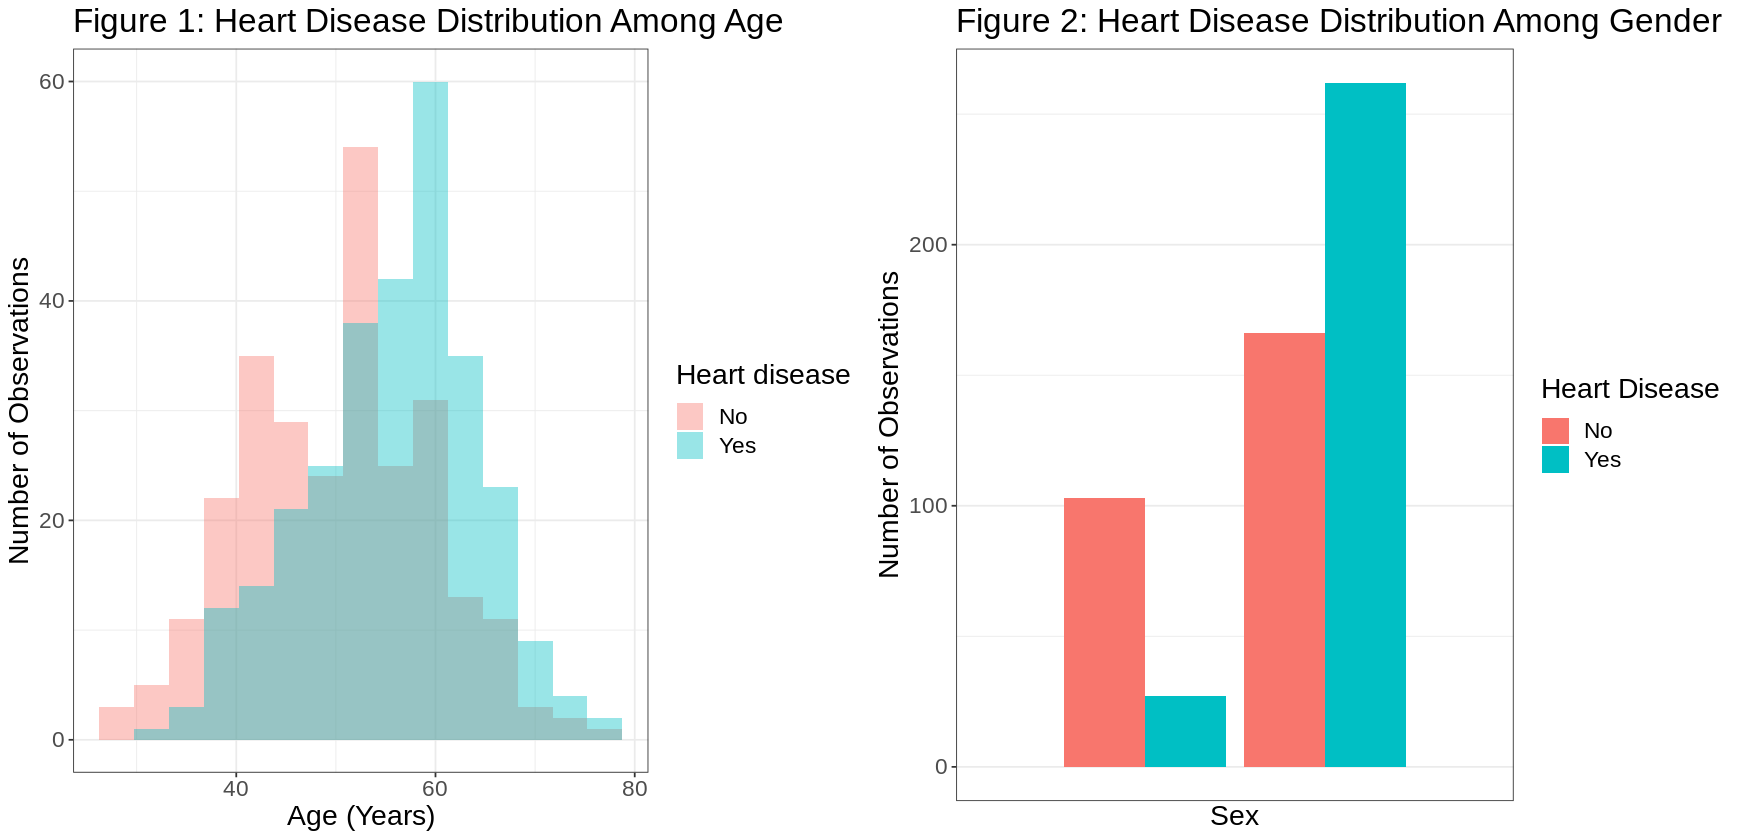

In [17]:
options(repr.plot.width = 14.5, repr.plot.height = 7)

age_distribution <- ggplot (heart_data_train, aes (x= age, fill = num))+
  geom_histogram (position = "identity", alpha = 0.4, bins =15)+
  theme_bw ()+
  xlab ("Age (Years)") +
  ylab ("Number of Observations")+
    labs (fill ="Heart disease")+
    scale_fill_discrete( labels= c("0" = "No", "1"= "Yes"))+
  ggtitle("Figure 1: Heart Disease Distribution Among Age")+
theme(plot.title = element_text(size=20))+
theme (text = element_text (size =17))

sex_distribution <- ggplot (heart_data_train, aes (x= sex, fill = num))+
  geom_histogram (position = "dodge", stat ="count")+
  theme_bw () +
  xlab ("Sex") +
  ylab ("Number of Observations")+
  labs (fill ="Heart Disease")+
  scale_x_discrete (labels = c("0" = "Female", "1" = "Male"))+
  scale_fill_discrete( labels= c("0" = "No", "1"= "Yes"))+
  ggtitle("Figure 2: Heart Disease Distribution Among Gender")+
theme(plot.title = element_text(size=20))+
theme (text = element_text (size =17))

plot01 <- plot_grid (age_distribution, sex_distribution)
plot01

Warning message:
“Ignoring unknown parameters: binwidth, bins, pad”


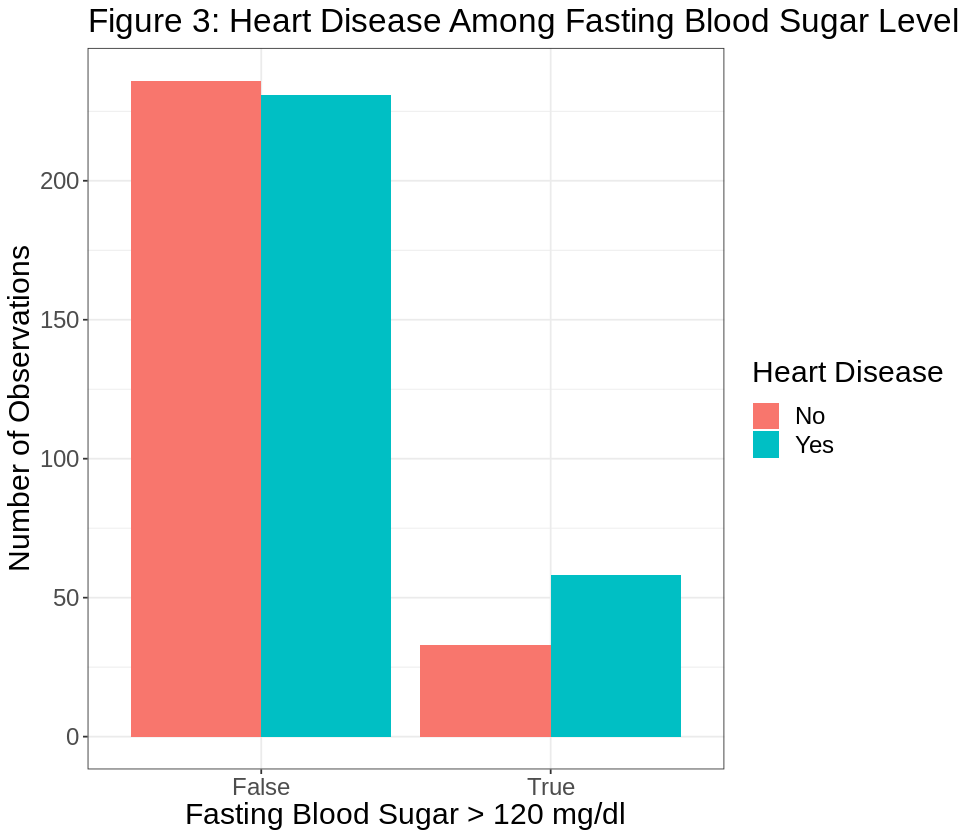

In [6]:
options(repr.plot.width = 8, repr.plot.height = 7)

fbs_distribution <- ggplot (heart_data_train, aes (x= fbs, fill = num ))+
  geom_histogram (position = "dodge", stat = "count")+
  theme_bw () +
  xlab ("Fasting Blood Sugar > 120 mg/dl") +
  ylab ("Number of Observations")+
  labs (fill ="Heart Disease")+
  scale_x_discrete (labels = c("0" = "False", "1" = "True"))+
  scale_fill_discrete( labels= c("0" = "No", "1"= "Yes"))+
  ggtitle("Figure 3: Heart Disease Among Fasting Blood Sugar Levels")+
theme(plot.title = element_text(size=20))+
theme (text = element_text (size =18))
fbs_distribution 


Warning message:
“Removed 1 rows containing non-finite values (stat_bin).”
Warning message:
“Removed 4 rows containing missing values (geom_bar).”


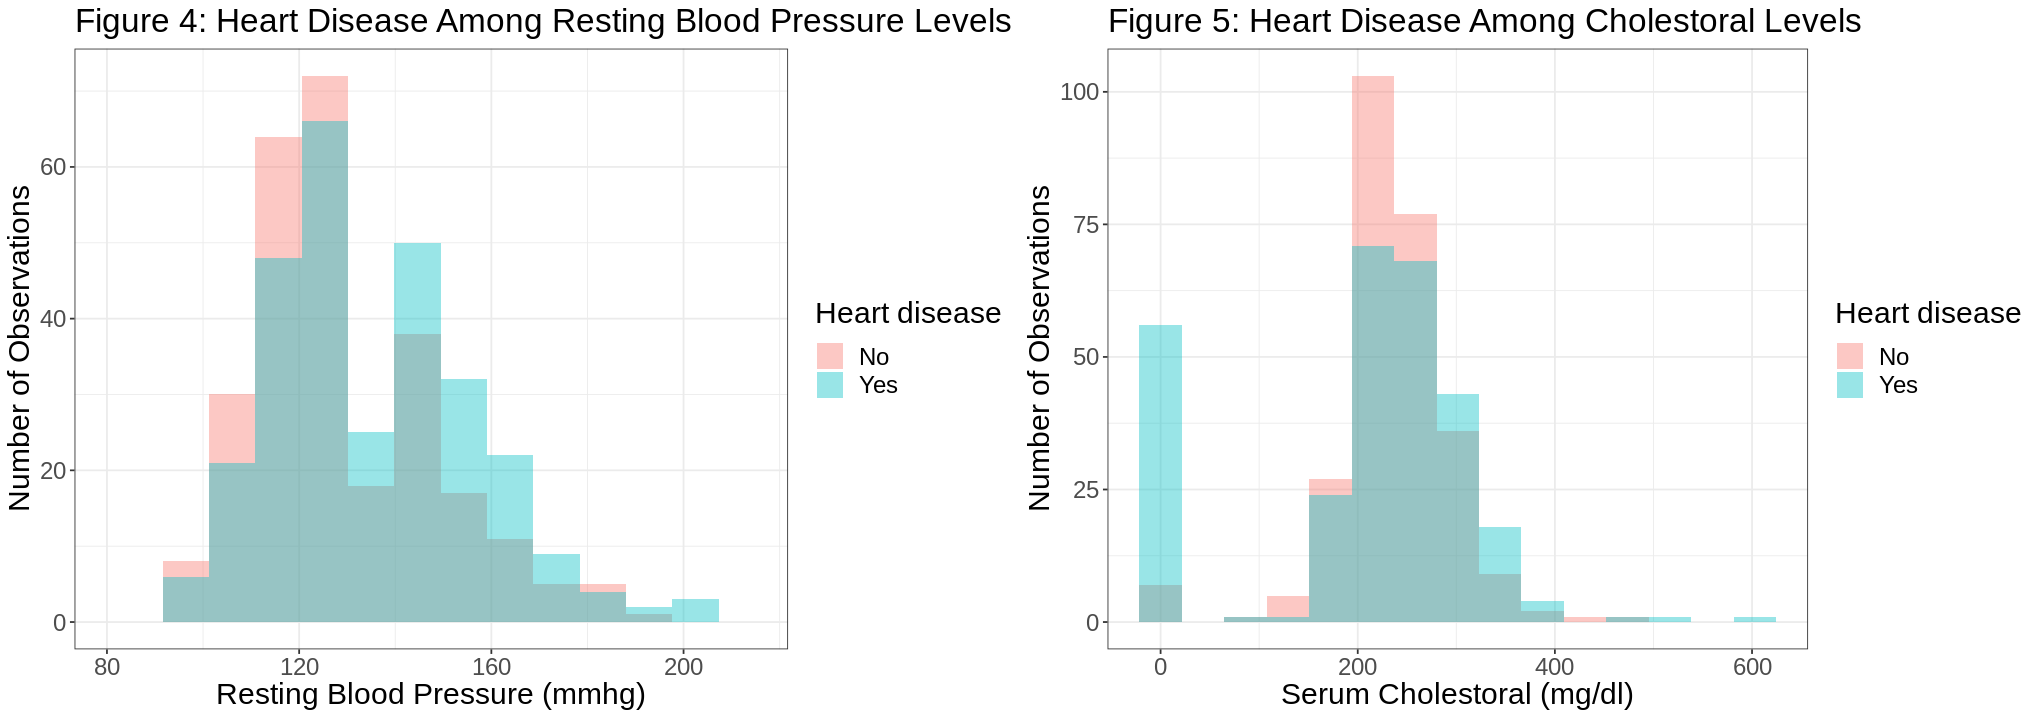

In [7]:
options(repr.plot.width = 17, repr.plot.height = 6)


trestbps_distribution <- ggplot (heart_data_train, aes (x= trestbps, fill = num))+
  geom_histogram (alpha = 0.4, bins = 15, position = "identity")+
  theme_bw ()+
  xlab ("Resting Blood Pressure (mmhg)") +
  ylab ("Number of Observations")+
  labs (fill ="Heart disease")+
xlim (80, 215)+
  scale_fill_discrete( labels= c("0" = "No", "1"= "Yes"))+
  ggtitle("Figure 4: Heart Disease Among Resting Blood Pressure Levels")+
theme(plot.title = element_text(size=20))+
theme (text = element_text (size =18))
 

library (tidymodels)
chol_distribution <- ggplot (heart_data_train, aes (x= chol, fill = num))+
  geom_histogram (position = "identity", bins = 15, alpha = 0.4)+
  theme_bw ()+
  xlab ("Serum Cholestoral (mg/dl)") +
  ylab ("Number of Observations")+
  labs (fill ="Heart disease")+
  scale_fill_discrete(labels= c("0" = "No", "1"= "Yes"))+
  ggtitle("Figure 5: Heart Disease Among Cholestoral Levels")+
theme(plot.title = element_text(size=20))+
theme (text = element_text (size =18))

plot1.0 <- plot_grid (trestbps_distribution, chol_distribution)
plot1.0

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.



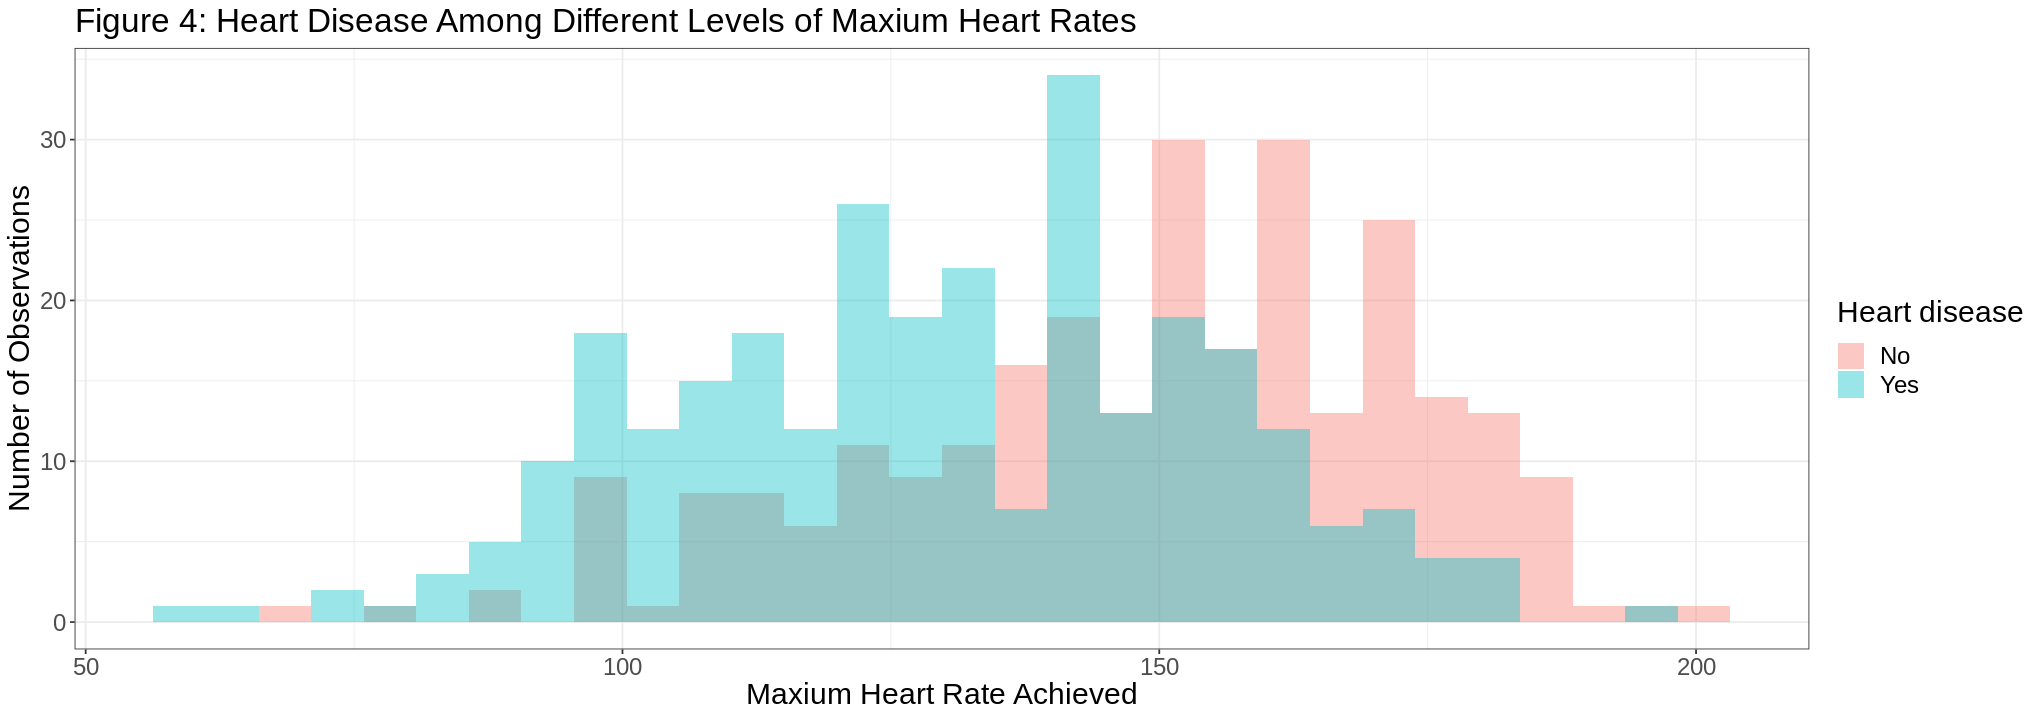

In [28]:
options(repr.plot.width = 17, repr.plot.height = 6)


thalach_distribution <- ggplot (heart_data_train, aes (x= thalach, fill = num))+
  geom_histogram (alpha = 0.4, position = "identity")+
  theme_bw ()+
  xlab ("Maxium Heart Rate Achieved") +
  ylab ("Number of Observations")+
  labs (fill ="Heart disease")+
  scale_fill_discrete( labels= c("0" = "No", "1"= "Yes"))+
  ggtitle("Figure 6: Heart Disease Among Different Levels of Maxium Heart Rates")+
theme(plot.title = element_text(size=20))+
theme (text = element_text (size =18))
thalach_distribution

Low levels in the maximum heart seem to be a good indicator for a positive heart diagnosis. 

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.



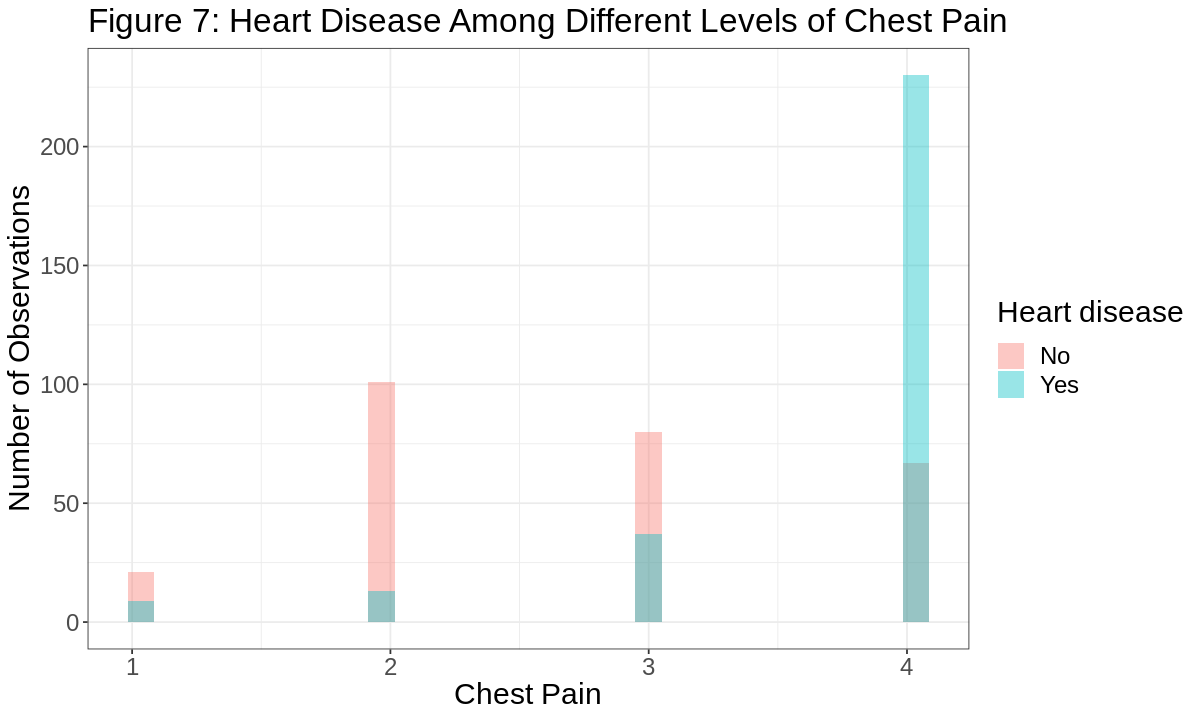

In [32]:
options(repr.plot.width = 10, repr.plot.height = 6)


chest_pain_distribution <- ggplot (heart_data_train, aes (x= cp, fill = num))+
  geom_histogram (alpha = 0.4, position = "identity")+
  theme_bw ()+
  xlab ("Chest Pain") +
  ylab ("Number of Observations")+
  labs (fill ="Heart disease")+
  scale_fill_discrete( labels= c("0" = "No", "1"= "Yes"))+
  ggtitle("Figure 7: Heart Disease Among Different Levels of Chest Pain")+
theme(plot.title = element_text(size=20))+
theme (text = element_text (size =18))
chest_pain_distribution

Most of the observations in our data set who have a heart disease do not suffer from chest pain meaning they are asymptomatic. This fact increases the need for good diagnosis methods for asymptomatic patients. 

In [8]:
#begin training the model 

In [9]:
knn_tune <- nearest_neighbor(weight_func = "rectangular", neighbors = tune ()) |>
            set_engine("kknn") |>
            set_mode("classification")

In [10]:
knn_vfold <- vfold_cv (heart_data_train, v = 5, strata = num)

In [11]:
heart_recipe <- recipe (num ~ trestbps+fbs+age+sex+chol+thalach+cp, data = heart_data_train) |>
step_scale (age, trestbps, chol, thalach,cp) |>
step_center (age, trestbps, chol, thalach, cp)

heart_recipe

Recipe

Inputs:

      role #variables
   outcome          1
 predictor          7

Operations:

Scaling for age, trestbps, chol, thalach, cp
Centering for age, trestbps, chol, thalach, cp

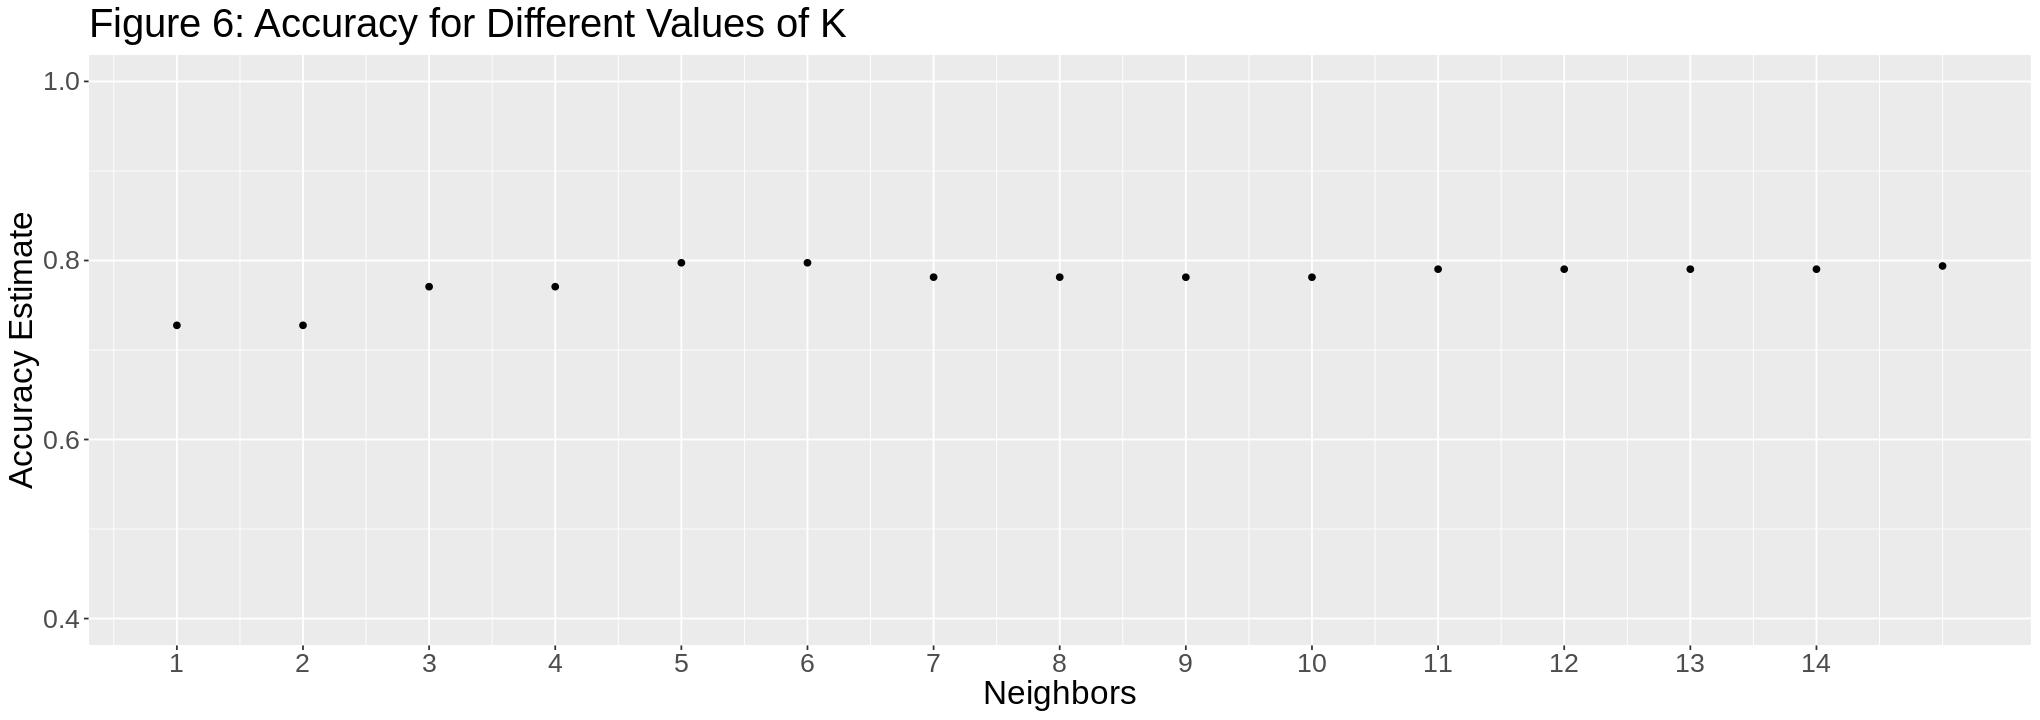

In [12]:
gridvals <- tibble (neighbors = seq (1,15))
knn_results <- workflow() |>
               add_recipe(heart_recipe) |>
               add_model(knn_tune) %>%
               tune_grid(resamples = knn_vfold, grid = gridvals) %>%
               collect_metrics()

knn_accuracy <- knn_results |>
filter (.metric == "accuracy")

accuracy_plot <- ggplot (knn_accuracy, aes (x= neighbors, y= mean)) +
geom_point () +
xlab ("Neighbors") +
ylab ("Accuracy Estimate") +
theme(text = element_text(size = 20)) +
scale_x_continuous(breaks = seq(0, 14, by = 1)) +
scale_y_continuous(limits = c(0.4, 1.0))+
ggtitle ("Figure 6: Accuracy for Different Values of K")
accuracy_plot



In [13]:
#we can see in this graph that k=3 seems to be a good value
knn_spec <- knn_tune <- nearest_neighbor(weight_func = "rectangular", neighbors = 5) |>
            set_engine("kknn") |>
            set_mode("classification")

knn_fit <- workflow() |>
               add_recipe(heart_recipe) |>
               add_model(knn_spec) |>
               fit (heart_data_train)

knn_predict <- knn_fit |>
predict (heart_data_test) |>
bind_cols (heart_data_test)

knn_metrics <- knn_predict |>
metrics (truth = num, estimate= .pred_class)
knn_metrics

.metric,.estimator,.estimate
<chr>,<chr>,<dbl>
accuracy,binary,0.7326203
kap,binary,0.4644903


In [14]:
#create a confusion matrix
heart_conf_matrix <- knn_predict |>
conf_mat (truth = num, estimate = .pred_class)
cat ("Table 2: Confusion Matrix for the Classification Model")
heart_conf_matrix

Table 2: Confusion Matrix for the Classification Model

          Truth
Prediction  0  1
         0 65 25
         1 25 72

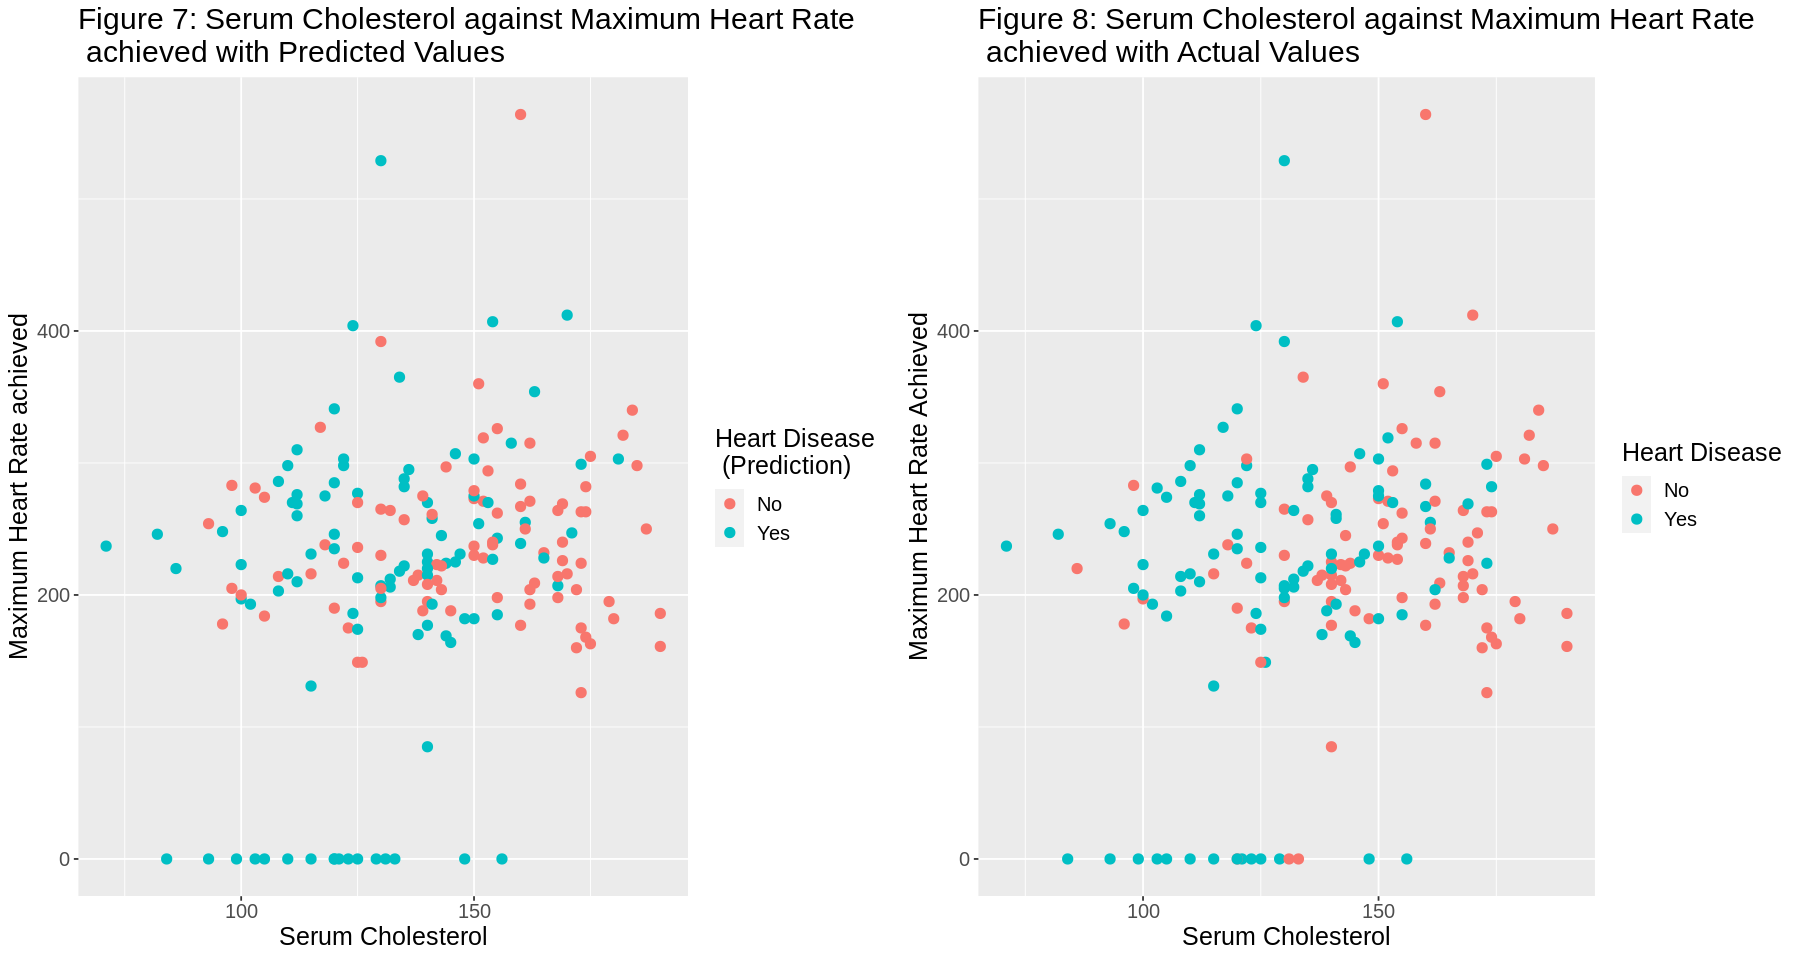

In [15]:
options(repr.plot.width = 15, repr.plot.height = 8)
prediction_plot <- ggplot (knn_predict, aes (x=thalach, y= chol)) +
geom_point (aes(color = .pred_class), size = 2.5) +
xlab ("Serum Cholesterol")+
ylab ("Maximum Heart Rate achieved")+
labs (color="Heart Disease \n (Prediction)")+
scale_color_discrete( labels= c("0" = "No", "1"= "Yes"))+
theme (text =element_text (size =15))+
ggtitle ("Figure 7: Serum Cholesterol against Maximum Heart Rate \n achieved with Predicted Values")


actual_plot <- ggplot (knn_predict, aes (x=thalach, y= chol)) +
geom_point (aes(color = num), size = 2.5) +
xlab ("Serum Cholesterol")+
ylab ("Maximum Heart Rate Achieved")+
labs (color = "Heart Disease")+
scale_color_discrete( labels= c("0" = "No", "1"= "Yes"))+
theme (text =element_text (size =15))+
ggtitle ("Figure 8: Serum Cholesterol against Maximum Heart Rate \n achieved with Actual Values")
 

plot_grid (prediction_plot, actual_plot, nrow = 1)
#size of label and points

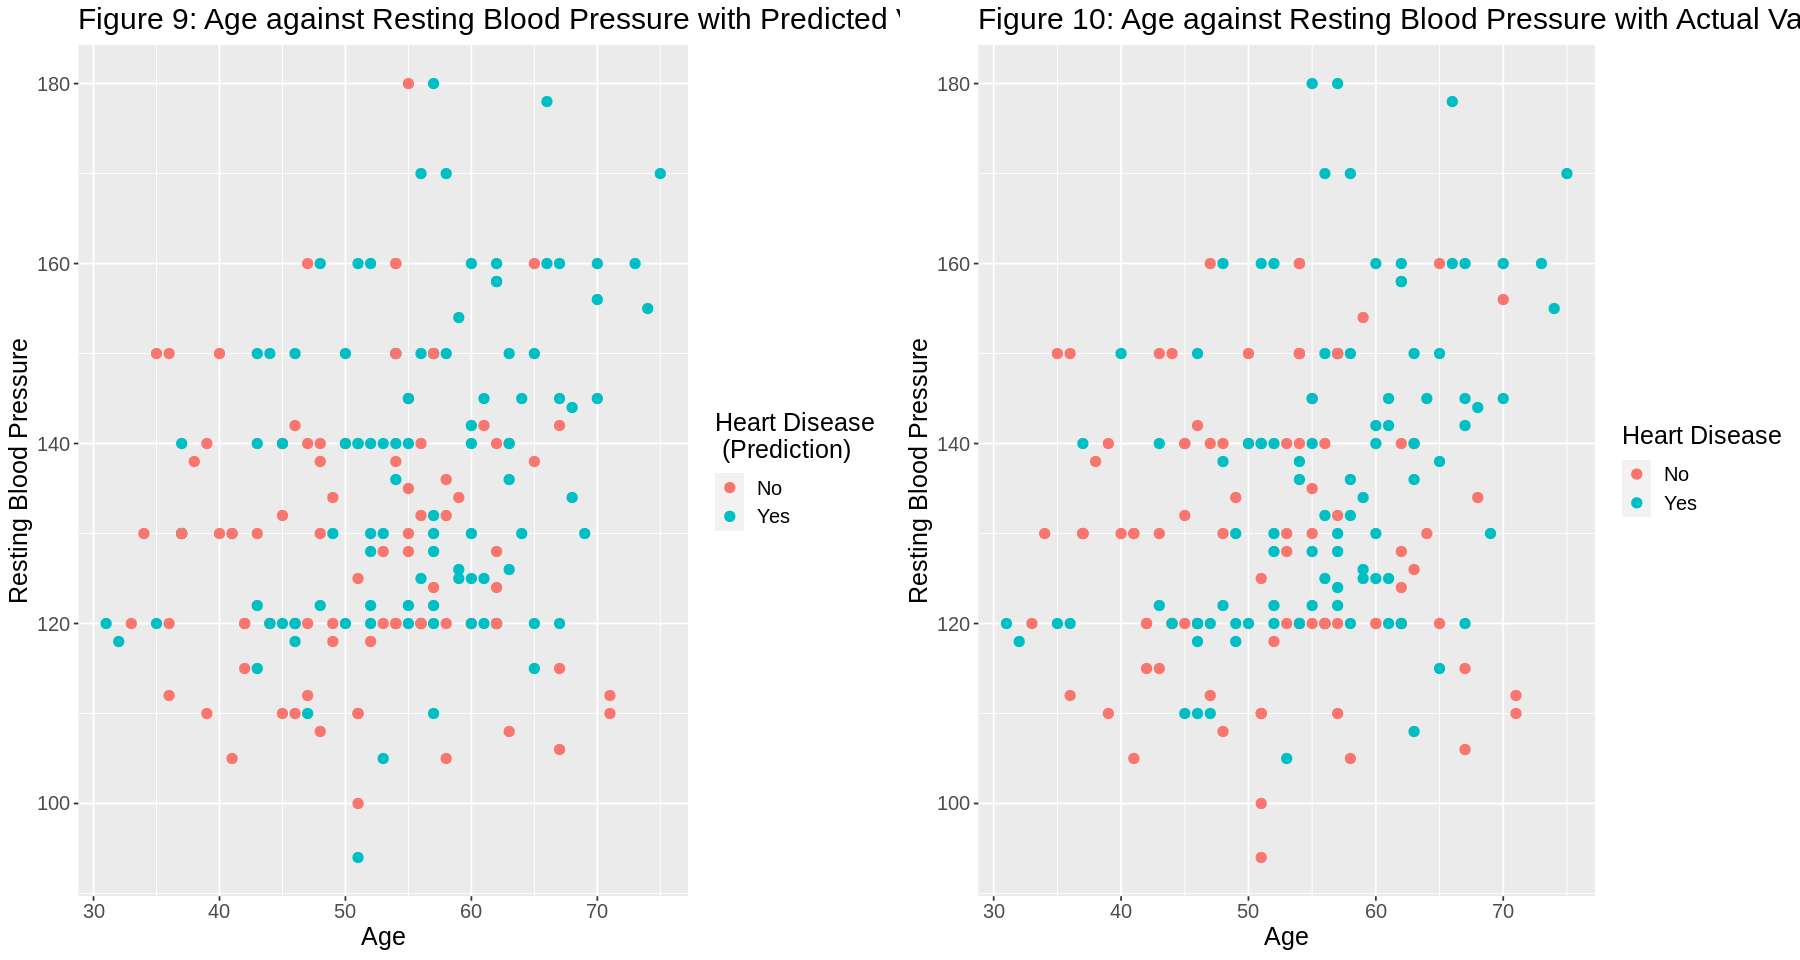

In [16]:
options(repr.plot.width = 15, repr.plot.height = 8)
prediction_plot <- ggplot (knn_predict, aes (x=age, y= trestbps)) +
geom_point (aes(color = .pred_class), size = 2.5) +
xlab ("Age")+
ylab ("Resting Blood Pressure")+
labs (color="Heart Disease \n (Prediction)")+
scale_color_discrete( labels= c("0" = "No", "1"= "Yes"))+
theme (text =element_text (size =15))+
ggtitle ("Figure 9: Age against Resting Blood Pressure with Predicted Values")


actual_plot <- ggplot (knn_predict, aes (x=age, y= trestbps)) +
geom_point (aes(color = num), size = 2.5) +
xlab ("Age")+
ylab ("Resting Blood Pressure")+
labs (color = "Heart Disease")+
scale_color_discrete( labels= c("0" = "No", "1"= "Yes"))+
theme (text =element_text (size =15))+
ggtitle ("Figure 10: Age against Resting Blood Pressure with Actual Values")
 

plot_grid (prediction_plot, actual_plot, nrow = 1)

**Discussion**

In summary, we created a classification model with k=6 and an accuracy of 60% in order to predict the presence or absence of a heart disease based on five variables, age, sex, blood pressure, cholestrol, and fasting blooding sugar, which were considered risk factors according to the CDC. From our cross-validation results, a k-value of 5 gave optimal accuracy and changing the value to a nearby 1 (increasing or decreasing by a small number) doesn't change the accuracy too much as seen in Figure 6. 
An accuracy of 60 % is not what we expected to find as we expected the accuracy to be higher since we were examining variables that were risk factors for heart disease according to the CDC. Therefore we examined past literature to see if other variables were related to heart disease. Two variables, chest pain presence and maximum heart rate were found to be associated with heart disease (Detrano et al., 1989 and Gennari et al., 1989). Thus, we added "cp" and "thalach" corresponding to chest pain presence and maximum heart rate  to our classifcation model. Including these two variables increased our accuracy to 73%. Thus, it showed that these variables were important and relevant to our classification model. What the accuracy tells us is that 73% of the time (73 out of 100), our model will predict the presence or absence of a heart disease correctly.
Next, we created four plots to examine the model visually. In the first two plots (Figures 7 and 8), we plotted maximum heart rate vs serum cholestrol while colouring the data points based on heart disease presence. In the second set of plots, we examined resting blood pressure vs age in figures 9 and figure 10. Figures 7 and 9 were both created using the predicted heart disease diagnosis from our model and Figures 8 and 10 were from the actual diagnosis from the original data. Visually, the plots from both sets looked similar between the predicted and actual value. Thus visually, it appears to be doing a decent job at predicting the presence or absence of a heart disease. The results from the plots were as expected as we would expect the model to predict correctly the presence of a heart disease 73% of the time. However, it's important to note that just examining the model visually is not a good indication of the fit of the model, it is imperative we calculate the accuracy which we have done prior and obtained 73%.
By looking at the Confusion Matrix (Table 2) we can see that many people have asymptomatic heart diseases which are often undiagnosed (in our model 25 patients) and in turn not treated for their disease. This could affect their quality of life. Thus with our predictive model, we can help diagnose patients with or without symptoms. However, since our model only has a 73% accuracy level it may not be suitable for use in a clinical setting as is. This is because we could misdiagnose 27% of the patients using our model which could be costly for patients and the healthcare system. Thus, in order to use a predictive model such as ours in a clinical setting, the model needs to be further tuned to increase the accuracy. Some ways to do so is examining whether there are additional variables that could be added to create the model which are relevant to heart disease.

From our project, future questions can predict the severity level of the heart disease by including the original levels (0-4) of the "num" variable from the original data set (we changed it to a binary variable for this project). This would be an expansion to our current project where we only ask whether someone has a heart disease or not and not the severity.

**References:**

1. Centers for Disease Control and Prevention. (2022, October 14). Heart disease facts. Centers for Disease Control and Prevention. Retrieved October 17, 2022, from https://www.cdc.gov/heartdisease/facts.htm 
2. Centers for Disease Control and Prevention. (2022, September 8). Heart disease and stroke. Centers for Disease Control and Prevention. Retrieved October 18, 2022, from https://www.cdc.gov/chronicdisease/resources/publications/factsheets/heart-disease-stroke.htm 
3. Dai, H., Bragazzi, N. L., Younis, A., Zhong, W., Liu, X., Wu, J., & Grossman, E. (2021). Worldwide trends in prevalence, mortality, and disability-adjusted life years for hypertensive heart disease from 1990 to 2017. Hypertension, 77(4), 1223-1233.
4. Detrano, R., Janosi, A., Steinbrunn, W., Pfisterer, M., Schmid, J., Sandhu, S., Guppy, K., Lee, S., & Froelicher, V. (1989). International application of a new probability algorithm for the diagnosis of coronary artery disease. American Journal of Cardiology, 64,304--310.
5. Gennari, J.H., Langley, P, & Fisher, D. (1989). Models of incremental concept formation. Artificial Intelligence, 40, 11--61. 
6. Janosi, A., Steinbrunn, W., Pfisterer, M., & Detrano, R. (1988). Heart Disease Data Set, UCI Machine Learning Repository.
7. UPenn medicine. (n.d.). Pennmedicine.org. Retrieved November 28, 2022, from https://www.pennmedicine.org/updates/blogs/heart-and-vascular-blog/2015/february/protecting-your-heart-what-is-a-healthy-cholesterol-level-for-you 
